In [1]:
from subprocess import Popen, PIPE
from matplotlib import pyplot as plt
from math import sqrt
import numpy as np
import os

In [7]:
name = 'CLL1525_CLL110'

In [8]:
#file1 = '~/Documents/Loops_Homer/'+name+'.HomerDir.loop.2D.bed'
#file2 = '~/Documents/Loops_Hiccups/'+name+'.merged_loops.bedpe'

#file1 = "/mnt/marenostrum/HomerNewRes/CLL_1525/CLL1525_5kb.loop.2D.bed"
#file2 = "/mnt/marenostrum/HomerNewRes/CLL_1525/CLL1525_25kb.loop.2D.bed"

file1 = "/home/balpaula/Documents/HomerNewRes/CLL_1525/CLL1525_5kb.loop.2D.bed"
file2 = "/home/balpaula/Documents/HomerNewRes/CLL_110/CLL110_5kb.loop.2D.bed"

# Sort loops and create dictionaries
proc1 = Popen('sort -k1,1n -k4,4n -k2,2n -k5,5n {}'.format(file1), shell=True, stdout=PIPE)
proc2 = Popen('sort -k1,1n -k4,4n -k2,2n -k5,5n {}'.format(file2), shell=True, stdout=PIPE)

lines1 = proc1.stdout.readlines()
lines2 = proc2.stdout.readlines()

lines1 = [l for l in lines1 if not l.startswith('Y')]
lines2 = [l for l in lines2 if not l.startswith('Y')]

loops1 = {}
loops2 = {}

for i in range(len(lines1)):
    line = lines1[i]
    loops1[i] = line.split()[:6]
    
for j in range(len(lines2)):
    line = lines2[j]
    loops2[j] = line.split()[:6]
    
# Compute metric of distance between loops
mat = np.zeros((len(lines1),len(lines2)))

for l1 in loops1:
    c11, b11, e11, c12, b12, e12 = loops1[l1]
    
    b11 = float(b11) 
    e11 = float(e11) 
    b12 = float(b12) 
    e12 = float(e12) 
    
    for l2 in loops2:    
        c21, b21, e21, c22, b22, e22 = loops2[l2]
        
        # Check if the loops are in the same chromosomes
        if c11 == c21 and c12 == c22:
        
            b21 = float(b21) 
            e21 = float(e21) 
            b22 = float(b22) 
            e22 = float(e22) 

            D1 = ((e21 - b21)/2 + b21) - ((e11 - b11)/2 + b11) #difference in distance midpoints ends 1
            D2 = ((e22 - b22)/2 + b22) - ((e12 - b12)/2 + b12) #difference in distance midpoints ends 2

            mat[l1,l2] = sqrt((float(D1)**2+float(D2)**2)/2)
            
        else:
            mat[l1,l2] = float('nan')
        
#print(mat)

/home/balpaula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log2
  """


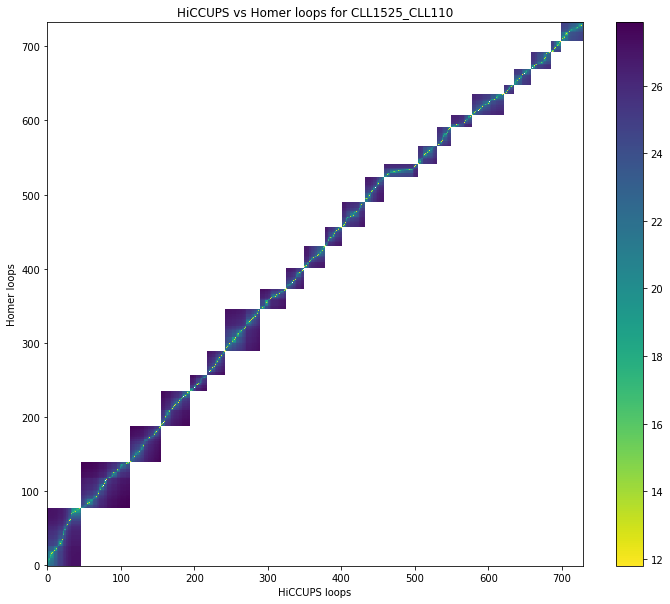

In [9]:
plt.figure(figsize=(12, 10))
plt.title('HiCCUPS vs Homer loops for '+name)
plt.xlabel('HiCCUPS loops')
plt.ylabel('Homer loops')
plt.imshow(np.log2(mat), origin='lower', aspect='auto', cmap='viridis_r')
plt.colorbar()
plt.savefig(name+'_loops_comparison.png')

In [10]:
2**16

65536

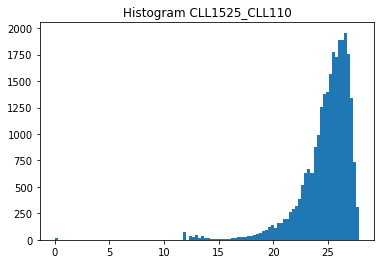

In [11]:
matp = mat.reshape(-1)
matp = matp[~np.isnan(matp.reshape(-1))] + 1

_ = plt.hist(np.log2(matp), bins=100)

plt.title('Histogram '+name)
plt.savefig(name+'_histogram.png')

In [12]:
len(lines1)

733

In [13]:
len(lines2)

729

In [14]:
len(lines1)*len(lines2)

534357

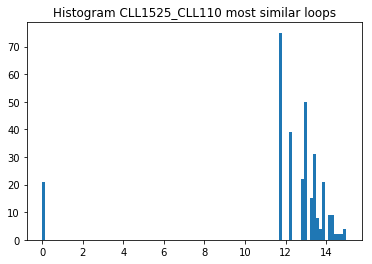

In [15]:
_ = plt.hist(np.log2(matp), bins=100, range=(0,15))

plt.title('Histogram '+name+' most similar loops')
plt.savefig(name+'_histogram_zoom.png')

In [12]:
plt.close()

In [13]:
# How many loops comparisons have <15kb distance
(np.log2(matp)<15).sum()

57

In [14]:
# How many loops comparisons have <3kb distance
(np.log2(matp)<3).sum()

0

In [15]:
if not os.path.exists('commonLoops'):
    os.makedirs('commonLoops')

In [16]:
i, j = np.where(np.log2(mat)<3)

if len(i) or len(j): #len(i)==len(j) in fact
    out = open("./commonLoops/"+name+".closest_loops.3kb.txt", "w")
    out.write("#Homer loops \n")
    for ele in i:
        c1, b1, e1, c2, b2, e2 = lines1[ele].split()[:6]
        out.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(c1,b1,e1,c2,b2,e2,"homer"))
    
    out.write("#HiCCUPS loops \n")
    for ele in j:
        c1, b1, e1, c2, b2, e2 = lines2[ele].split()[:6]
        out.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(c1,b1,e1,c2,b2,e2,"hiccups"))
    
    out.close()

/home/balpaula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [17]:
i, j = np.where(np.log2(mat)<15)

if len(i) or len(j): #len(i)==len(j) in fact
    out = open("./commonLoops/"+name+".closest_loops.15kb.txt", "w")
    out.write("#Homer loops \n")
    for ele in i:
        c1, b1, e1, c2, b2, e2 = lines1[ele].split()[:6]
        out.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(c1,b1,e1,c2,b2,e2,"homer"))
    
    out.write("#HiCCUPS loops \n")
    for ele in j:
        c1, b1, e1, c2, b2, e2 = lines2[ele].split()[:6]
        out.write('{}\t{}\t{}\t{}\t{}\t{}\t{}\n'.format(c1,b1,e1,c2,b2,e2,"hiccups"))
    
    out.close()

/home/balpaula/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
